# HelioCloud at AGU 2024
## Big data, burst capability, collaboration, science-in-the-browser

### This notebook showcases HelioCloud, the NASA-created cloud platform for big data, high end computing, and data collaboration that any institution can set up.  It includes Petabytes of CDAWeb, MMS, SDO and contributed datasets.  It features:

1) Science in your browser with a Python environment that 'just works'
2) Ability to search and find data from many missions
3) Computing on datasets without having to transfer them to your laptop
4) Analysis and plotting interactively in Jupyter Notebooks
5) Spinning up 100+ temporary CPUs or GPUs for a big analysis task using Dask
6) Examples from many of the PyHC core packages, such as HAPI, SunPy, Kamodo

In [1]:
# ensure we have the proper versions, and plotting capability
import os
import pkg_resources
try:
    pkg_resources.require("cloudcatalog>0.5.0")  # modified to use specific numpy
except:
    %pip install cloudcatalog --upgrade
    os._exit(00)
import matplotlib.pyplot as plt
# optional, prettier inline Notebook plotting
%matplotlib inline
%config InlineBackend.figure_formats = ['svg'] 
import warnings
warnings.filterwarnings( "ignore")

# HelioCloud shared cloud file registry (cloudcatalog)

### This is a simple standard for any dataset that enables users to access it via an API or directly.  You ask for a dataID over a time range, and it returns pointers to the relevant files.

The short definition is:

    * Anyone can publish an S3 disk with a 'catalog.json' describing their datasets
    * Each dataset has a flat-file <dataid>_YYYY.csv index of its contents
    * These fetchable indexes have the form "start, stop, file_location, filesize" (plus optional metadata)
    * A python client allows easy search and fetch using data IDs and time ranges
    
### Here is an example querying for the filelists for MMS Survey data and SDO's AIA images for all of Aug 2020.

In [2]:
import cloudcatalog
mms_ids = cloudcatalog.EntireCatalogSearch().search_by_id('srvy_ion')
aia_ids = cloudcatalog.EntireCatalogSearch().search_by_keywords(['AIA 0193'])
print(f"ID search: found {len(mms_ids)} IDs matching 'srvy_ion' and {len(aia_ids)} IDs matching 'AIA 0193', picking first of each set.")

mmsID, aiaID = mms_ids[0]['id'], aia_ids[0]['id']
start, stop = '2020-08-01T00:00:00Z', '2020-08-30T00:00:00Z'
fr=cloudcatalog.CloudCatalog("s3://gov-nasa-hdrl-data1/")
mms_files = fr.request_cloud_catalog(mmsID, start_date=start, stop_date=stop)
aia_files = fr.request_cloud_catalog(aiaID, start_date=start, stop_date=stop)
print(f"Filelists: found {len(mms_files)} {mmsID} files, {len(aia_files)} {aiaID} files for time range {start} to {stop}")
file1 = mms_files.iloc[0]['datakey']
print(f"\nFor example, here is our {mmsID} files")
mms_files

ID search: found 4 IDs matching 'srvy_ion' and 1 IDs matching 'AIA 0193', picking first of each set.
Filelists: found 20 mms1_feeps_srvy_ion files, 9892 aia_0193 files for time range 2020-08-01T00:00:00Z to 2020-08-30T00:00:00Z

For example, here is our mms1_feeps_srvy_ion files


start       stop                                            datakey  \
212 2020-07-31 2020-08-01  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
213 2020-08-01 2020-08-02  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
214 2020-08-02 2020-08-03  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
215 2020-08-03 2020-08-04  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
216 2020-08-04 2020-08-05  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
217 2020-08-05 2020-08-06  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
218 2020-08-06 2020-08-07  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
219 2020-08-07 2020-08-08  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
220 2020-08-08 2020-08-19  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
221 2020-08-19 2020-08-20  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
222 2020-08-20 2020-08-21  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
223 2020-08-21 2020-08-22  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
224 2020-08-22 2020-08-23  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
225 2020-08-23 2020-08-24  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
226 2020-08-24 2020-08-25  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
227 2020-08-25 2020-08-26  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
228 2020-08-26 2020-08-27  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
229 2020-08-27 2020-08-28  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
230 2020-08-28 2020-08-29  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   
231 2020-08-29 2020-08-30  s3://gov-nasa-hdrl-data1/spdf/cdaweb/mms/mms1/...   

     filesize  
212  88874919  
213  88874919  
214  88895159  
215  88912869  
216  88910339  
217  88905279  
218  88902749  
219  88900219  
220  74565239  
221  61518029  
222  88902749  
223  88900219  
224  88900219  
225  88948289  
226  88996359  
227  88991299  
228  88988769  
229  88988769  
230  88983709  
231  88978649

## Let's do something useful: plot an MMS time series, plot some SDO images


Here we go. We will plot an MMS's FEEPS electron survey files and a sequence of SDO's AIA 193A EUV images. For MMS can use the 'cdflib' to remotely read the cloud-stored MMS datafile and plot it as usual.  This is identical to working with CDFs on your laptop, but with no network transfers. The data and the computation occur in the AWS cloud.

### We first plot several MMS magnetic field and proton count values. Then we will generate then plot AIA EUV images (using AstroPy).  Again, we are not copying the disk to our machine, but reading directly from the cloud to plot.

In [3]:
import cdflib
from matplotlib import pyplot as plt
with cdflib.CDF(file1) as fin:
    #print(fin.cdf_info())
    try:
        varnames = fin.cdf_info().zVariables
    except:
        varnames = fin.cdf_info()['zVariables']
    x = fin.varget("epoch")
    y = fin.varget(varnames[5])
    plt.xlabel("Index")
    plt.ylabel(varnames[5])
    plt.title(f"Plot of {varnames[5]}")
    plt.plot(x,y)
    plt.show()

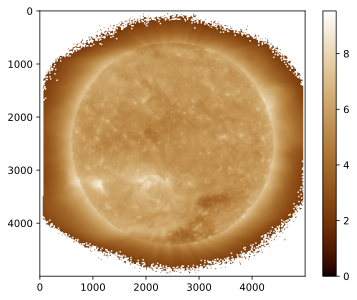

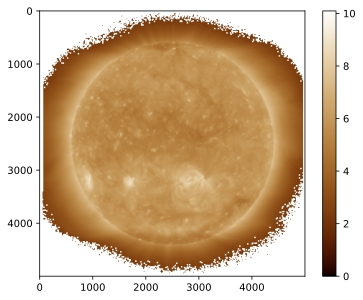

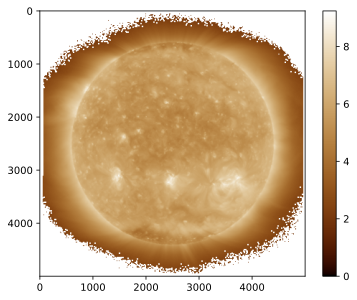

In [4]:
import astropy.io.fits
import matplotlib
from matplotlib import pyplot as plt
import sunpy.visualization.colormaps as cm
import numpy as np

cmap = matplotlib.colormaps['sdoaia193']
for i in range(0,2200,700): #ele in aia_files.iloc[1:4]: #np.nditer(aia_files, REFS_OK=True):
    fname = aia_files.iloc[i]['datakey']
    try:
        hdul = astropy.io.fits.open(fname)
    except:
        import s3fs
        fs=s3fs.S3FileSystem(anon=True)
        hdul = astropy.io.fits.open(fs.open(fname))
    if i > 0:
        plt.imshow(np.log(hdul[1].data), cmap=cmap)
        plt.colorbar()
        plt.show()

## We can also use PyHC packages in this browser.

### We've already shown AstroPy, and now we give examples for HAPI time series data, SunPy image data, and Kamodo model generation.

These HAPI time series fetches or SunPy image calls or Kamodo model generations, executed within this Notebook, are the same as it would be on your laptop.  

For HAPI, we look at DST1800 and Proton_QI1800 from OMNIWeb, from the 2022 PyHC Summer School tutorial.

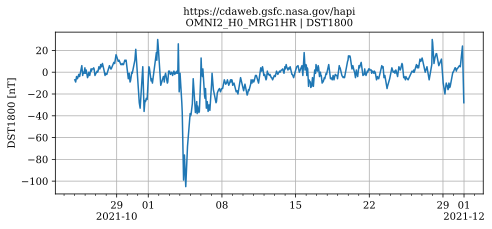

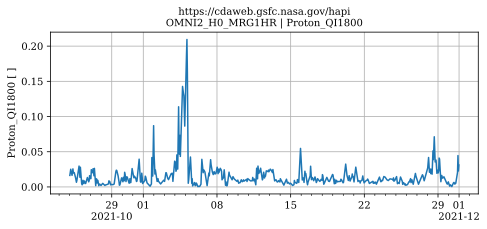

In [5]:
from hapiclient import hapi
from hapiplot import hapiplot
###    import math
# HAPI test, OMNIWeb data
# The data server
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
# The data set
dataset    = 'OMNI2_H0_MRG1HR'
# Start and stop times
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
# The HAPI convention is that parameters is a comma-separated list. Here we request two parameters.
parameters = 'DST1800,Proton_QI1800'
# Configuration options for the hapi function.
opts = {'logging': False, 'usecache': True, 'cachedir': './hapicache' }
# Get parameter data. See section 5 for for information on getting available datasets and parameters
data, meta = hapi(server, dataset, parameters, start, stop, **opts)
meta = hapiplot(data, meta)

### SunPy

### This is the SunPy AIA Demo

We fetch a single demo AIA 171A EUV image and adding in WCS and prettier plotting. This is from https://docs.sunpy.org/en/stable/tutorial/maps.html. Again the code to run this is identical to your laptop code, because HelioCloud is about science.

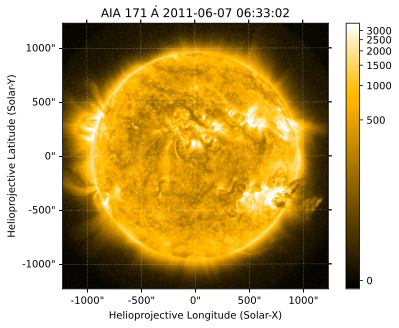

In [6]:
import sunpy.map
import sunpy.data.sample
import astropy.units as u
import matplotlib.pyplot as plt
sunpy.data.sample.AIA_171_IMAGE
my_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
fig = plt.figure()
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.5)*u.percent)
plt.colorbar()
plt.show()

### Kamodo modeling

Here we run the Kamodo model generator example from the 2022 PyHC Summer School.  

### Note the use of interactive plots-- you can use the mouse to rotate or change the plot size.

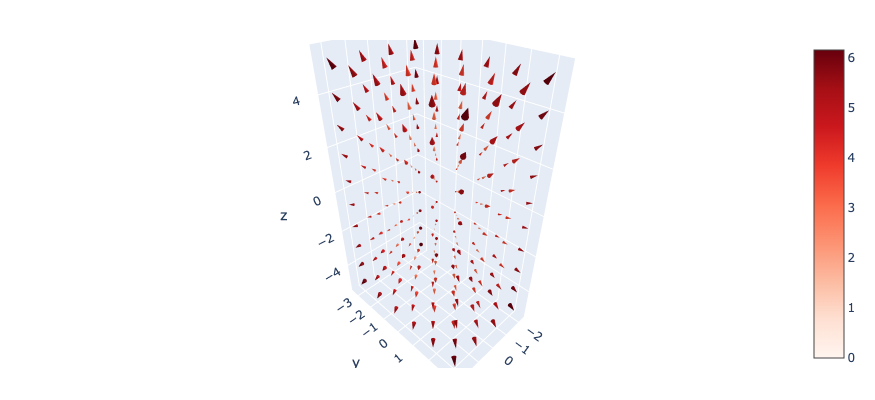

In [8]:
from kamodo import Kamodo
import numpy as np
x, y, z = np.meshgrid(np.linspace(-2,2,4),
                      np.linspace(-3,3,6),
                      np.linspace(-5,5,10))
points = np.array(list(zip(x.ravel(), y.ravel(), z.ravel())))
def fvec_Ncomma3(rvec_Ncomma3 = points):
    return rvec_Ncomma3
k = Kamodo(fvec_Ncomma3 = fvec_Ncomma3)
k.plot('fvec_Ncomma3')

## Ability to run a task with Lambdas (lambdas test) 

### Python Lambdas are a quick way to run a function on a large set of data with just 1 line of code.  

Here we do a very simple checksum on MMS files fetched from a CloudCatalog query.  You could just as easily add a function that does a more meaningful calculation, then run it on all the data with one line of invoking code.

Again, with HelioCloud we are skipping the usual sluggish copying over of data before processing, and instead doing the computation on the data directly in the cloud.  This provides you with ready access to data, avoids filling disks, is faster, and lets you share code so others can collaborate (they'll already have access to the Petabytes of data in HelioCloud's public cloud archive).

In [9]:
import cloudcatalog
fr=cloudcatalog.CloudCatalog("s3://gov-nasa-hdrl-data1/")
dataset_id1 = 'mms1_feeps_brst_electron'
start = '2020-08-01T00:00:00Z'
stop =   '2020-08-30T00:00:01Z'
file_registry1 = fr.request_cloud_catalog(dataset_id1, start_date=start, stop_date=stop, overwrite=False)
print(f"{len(file_registry1)} files, operating lambda on first ten.")
print('Python Hash of File | Start Date | File Size')

fr.stream(file_registry1[0:10], lambda bo, d, e, f: print(hash(bo.read()), d.replace(' ', 'T')+'Z', e, f))

667 files, operating lambda on first ten.
Python Hash of File | Start Date | File Size
3826902781140009854 2020-07-31T11:21:13Z 2020-08-01 07:55:33 1530200
-4905086817479632299 2020-08-01T07:55:33Z 2020-08-01 07:58:03 3635698
-1600504994238657962 2020-08-01T07:58:03Z 2020-08-01 08:00:23 3405746
2275041415508654199 2020-08-01T08:00:23Z 2020-08-01 08:02:53 3642884
450139878610364391 2020-08-01T08:02:53Z 2020-08-01 08:05:13 3405746
-9208273023687746356 2020-08-01T08:05:13Z 2020-08-01 08:27:23 3628512
5145755274811162701 2020-08-01T08:27:23Z 2020-08-01 10:06:23 1523014
-1929376884834985243 2020-08-01T10:06:23Z 2020-08-01 10:08:33 3175794
-3219353985091924417 2020-08-01T10:08:33Z 2020-08-01 10:10:43 3168608
2574822701990110171 2020-08-01T10:10:43Z 2020-08-01 10:13:03 3405746


# Cloud 'throw lots of CPUs at a problem' (Dask cluster) burst test

A big advantage of HelioCloud is the ability to send a computation to multiple CPUs, then gather the results.  This uses a library called Dask, which looks similar to a Python Lambda.  For example, given a function that does science 'process_fits_s3' and  a list of files 's3_files', the code is simply:
```
time_irrad = client.map(process_fits_s3, s3_files)
all_data = client.gather(time_irrad)
```
There is an initial time hit to spin up the Cluster of extra CPUs, but then this and subsequent jobs are very rapid. Our code block 1 sets up the data environment and has our 'DO_SCIENCE' analysis routines. Block 2 starts the cluster.  Block 3 does the dask run (and can be re-run).  Once done, Block 4 shuts down the cluster for good.  Again the cloud data is in AWS S3 and we do not copy the files over, but instead have CPUs at AWS access it directly.  

### 1 year of SDO 94A EUV images from AIA is 129,758 files, each 14MB, totalling 1.8 TB.  If done serially on your laptop, it would take 27 hours.   HelioCloud takes 25 minutes (1467 sec) to analyze through 1 year of SDO data.

(For demo purposes, we're only doing 100 files here, which takes under 1 minute).

In [10]:
import cloudcatalog
import boto3
import dask
import io
import time
import re
import astropy.io.fits
from dask.distributed import Client
from dask_gateway import Gateway, GatewayCluster
    
def DO_SCIENCE(mydata):
    # Calculates total irradiance from an image.  You can put better science here
    iirad = mydata.mean()
    return iirad

def process_fits_s3(s3key:str): # -> Tuple[str, float]:
    """ grabs an S3 file then runs DO_SCIENCE() on it """
    sess = boto3.session.Session() # do this each open to avoid thread problem 'credential_provider'
    s3c = sess.client("s3")
    [mybucket,mykey] = re.sub(r"s3://","",s3key).split("/",1)
    try:
        fobj = s3c.get_object(Bucket=mybucket,Key=mykey)
        rawdata = fobj['Body'].read()
        bdata = io.BytesIO(rawdata)
        hdul = astropy.io.fits.open(bdata,memmap=False)        
        date = hdul[1].header['T_OBS']
        irrad = DO_SCIENCE(hdul[1].data)
    except:
        print("Error fetching ",s3key)
        date, irrad = None, None       
    return date, irrad

frID, start, stop = 'aia_0094', '2021-10-25T00:00:00Z', '2021-12-01T00:00:00Z'
fr=cloudcatalog.CloudCatalog("s3://gov-nasa-hdrl-data1/")
file_registry1 = fr.request_cloud_catalog(frID, start_date=start, stop_date=stop, overwrite=False)
filelist = file_registry1['datakey'].to_list()
s3_files = filelist[0:100] # small test set to test

In [ ]:
""" Now we initialize the Dask gateway and cluster, using your above parameters, to set up the virtual machines that will subsequently operate on the data. We use some non-optimized Dask parameters for setting up the run."""
gateway = Gateway()
options = gateway.cluster_options()
options.worker_cores, options.worker_memory = 2, 1
cluster = gateway.new_cluster(options)
client=Client(cluster)
cluster.adapt(minimum=1, maximum=4)
client

In [ ]:
now=time.time()
try:
    time_irrad = client.map(process_fits_s3, s3_files) # do it
    all_data = client.gather(time_irrad) # gather results
    print("Done! Completed in time ",(time.time()-now)/60.0,"minutes, on",len(all_data),"files")
except:
    print("Cluster needs to be started (or re-started) before running code.")

In [ ]:
from matplotlib import pyplot as plt
plotme = [a for a in all_data if a[0] is not None]
fig, ax = plt.subplots()
ax.plot_date(*zip(*plotme),markersize=2)
ax.set_xticks(ax.get_xticks()[::10], ax.get_xticklabels()[::10], rotation=45, ha='right')
plt.show()

In [ ]:
yn=input("Do you want to shut down the cluster, or re-use it? (y/r)?")
if yn == 'y':
    cluster.shutdown()

# Recap

To recap, HelioCloud lets you do the same science as on your laptop using the same Python packages you already use, but in the cloud. This means a stable pre-loaded Python environment, fast access to Terabyte- and Petabyte-sized datasets, and the ability to throw lots of CPUs at data- or computation-heavy problems. Because everyone using a HelioCloud has the same software environment and data access rights, you can collaborate more easily because you only need to share code, not envs and datasets.

The HelioCloud 'stack' runs on AWS and is released as open source, so any institution can install it.  It is available via heliocloud.org.  HelioCloud is a NASA-funded software development effort and eagerly seeks community input.